# Keras Basics

Welcome to the section on deep learning! We'll be using Keras with a TensorFlow backend to perform our deep learning operations.

This means we should get familiar with some Keras fundamentals and basics!

## Imports



In [1]:
import numpy as np

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

## Dataset

We will use the Bank Authentication Data Set to start off with. This data set consists of various image features derived from images that had 400 x 400 pixels. You should note **the data itself that we will be using ARE NOT ACTUAL IMAGES**, they are **features** of images. In the next lecture we will cover grabbing and working with image data with Keras. This notebook focuses on learning the basics of building a neural network with Keras.

_____
More info on the data set:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

## Reading in the Data Set

We've already downloaded the dataset, its in the DATA folder. So let's open it up. 

In [5]:
from numpy import genfromtxt
data = genfromtxt('./bank_note_data.txt', delimiter=',')

In [6]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [7]:
labels = data[:,4]

In [8]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [9]:
features = data[:,0:4]

In [10]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [11]:
X = features
y = labels

## Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train

array([[-0.8734  , -0.033118, -0.20165 ,  0.55774 ],
       [ 2.0177  ,  1.7982  , -2.9581  ,  0.2099  ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [15]:
X_test

array([[ 1.5691  ,  6.3465  , -0.1828  , -2.4099  ],
       [-0.27802 ,  8.1881  , -3.1338  , -2.5276  ],
       [ 0.051979,  7.0521  , -2.0541  , -3.1508  ],
       ...,
       [ 3.5127  ,  2.9073  ,  1.0579  ,  0.40774 ],
       [ 5.504   , 10.3671  , -4.413   , -4.0211  ],
       [-0.2062  ,  9.2207  , -3.7044  , -6.8103  ]])

In [16]:
# y_train

In [17]:
# y_test

In [18]:
X_train.max()

17.9274

In [19]:
X_train.min()

-13.7731

In [20]:
X_train.shape , X_test.shape , X.shape

((919, 4), (453, 4), (1372, 4))

## Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler_object = MinMaxScaler()

In [23]:
scaler_object.fit(X_train)

MinMaxScaler()

In [24]:
scaled_X_train = scaler_object.transform(X_train)

In [25]:
scaled_X_test = scaler_object.transform(X_test)

Ok, now we have the data scaled!

In [26]:
X_train.max()

17.9274

In [27]:
X_train.min()

-13.7731

In [28]:
scaled_X_train.max()

1.0000000000000002

In [29]:
scaled_X_train.min()

0.0

In [30]:
X_train

array([[-0.8734  , -0.033118, -0.20165 ,  0.55774 ],
       [ 2.0177  ,  1.7982  , -2.9581  ,  0.2099  ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [31]:
scaled_X_train

array([[4.44850688e-01, 5.14130449e-01, 2.18194638e-01, 8.50172258e-01],
       [6.53339968e-01, 5.82655745e-01, 9.93242398e-02, 8.17696322e-01],
       [4.81846700e-01, 6.69377018e-01, 3.61193167e-01, 7.63368407e-01],
       ...,
       [4.11050776e-04, 8.63104170e-01, 2.34046756e-01, 3.74261253e-01],
       [2.58284115e-01, 6.16029366e-01, 2.33861752e-01, 7.02643151e-01],
       [2.65661395e-01, 2.44444278e-01, 7.20316361e-01, 7.44775785e-01]])

## Building the Network with Keras

Let's build a simple neural network!

In [32]:
# from keras.models import Sequential
# from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
# Creates model
model = Sequential()
# 8 Neurons, expects input of 4 features. 
# Play around with the number of neurons!!
model.add(Dense(4, input_dim=4, activation='relu'))
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(8, activation='relu'))
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(1, activation='sigmoid'))

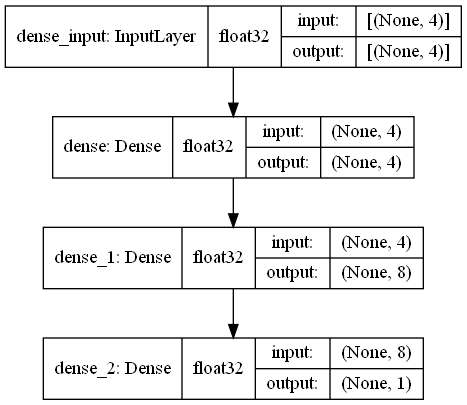

In [34]:
tf.keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [36]:
# tf.keras.backend.clear_session()

### Compile Model

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit (Train) the Model

In [38]:
# Play around with number of epochs as well!
history = model.fit(scaled_X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 0.6797 - accuracy: 0.6679
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6645 - accuracy: 0.6710
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6799
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.6773
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.6908
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.7331
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5773 - accuracy: 0.7361
Epoch 8/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7386
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7457
Epoch 10/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7630
Epoch 11/

In [ ]:
print(model.metrics_names)
print(model.history)
print(history.params)
print(history.history.keys())

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [40]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 29}

In [41]:
model.metrics_names

['loss', 'accuracy']

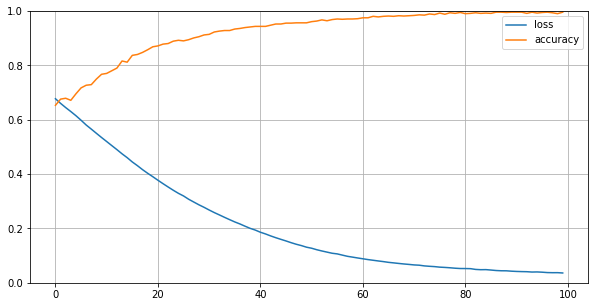

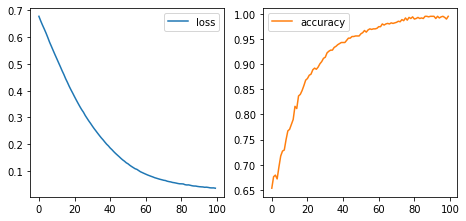

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(2,2), subplots=True)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
model.layers

In [64]:
model.layers[2].get_config()

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 1,
 'activation': 'sigmoid',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [73]:
weights, biases = model.layers[0].get_weights()
weights.shape, biases.shape

((4, 4), (4,))

In [72]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((4, 8), (8,))

In [74]:
weights, biases = model.layers[2].get_weights()
weights.shape, biases.shape

((8, 1), (1,))

In [75]:
weights

array([[ 2.5510423 ],
       [ 2.053684  ],
       [-1.9398512 ],
       [ 0.07681874],
       [ 1.1812029 ],
       [ 0.42078996],
       [-2.1763837 ],
       [ 1.9485974 ]], dtype=float32)

In [76]:
biases

array([0.07225467], dtype=float32)

## Predicting New Unseen Data

Let's see how we did by predicting on **new data**. Remember, our model has **never** seen the test data that we scaled previously! This process is the exact same process you would use on totally brand new data. For example , a brand new bank note that you just analyzed .

In [43]:
scaled_X_test

array([[0.62098955, 0.75284662, 0.21900753, 0.5730998 ],
       [0.48778602, 0.82175665, 0.09174727, 0.56211079],
       [0.51158363, 0.77924916, 0.13830875, 0.50392598],
       ...,
       [0.76115065, 0.62415668, 0.27251204, 0.83616757],
       [0.9047516 , 0.90329171, 0.03658247, 0.42267079],
       [0.49296526, 0.86039507, 0.06714046, 0.1622583 ]])

In [44]:
# Spits out probabilities by default.
# model.predict(scaled_X_test)

In [45]:
# model.predict_classes(scaled_X_test)

# Evaluating Model Performance

So how well did we do? How do we actually measure "well". Is 95% accuracy good enough? It all depends on the situation. Also we need to take into account things like recall and precision. Make sure to watch the video discussion on classification evaluation before running this code!

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(x=scaled_X_test, y=y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9912


[0.040733933448791504, 0.9911699891090393]

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
predictions = model.predict_classes(scaled_X_test)

C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
confusion_matrix(y_test,predictions)

array([[254,   3],
       [  1, 195]], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       257
         1.0       0.98      0.99      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



## Saving and Loading Models

Now that we have a model trained, let's see how we can save and load it.

In [52]:
model.save('model_1.h5')

In [53]:
from tensorflow.keras.models import load_model

In [54]:
newmodel = load_model('model_1.h5')

In [55]:
# newmodel.predict_classes(X_test)

In [56]:
predictions = model.predict_classes(scaled_X_test)

C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '

In [57]:
# predictions = np.argmax(model.predict(scaled_X_test), axis=-1) # softmax
predictions = (model.predict(scaled_X_test) > 0.5).astype("int") # sigmoid

In [58]:
predictions.dtype

dtype('int32')

In [59]:
confusion_matrix(y_test,predictions)

array([[254,   3],
       [  1, 195]], dtype=int64)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       257
         1.0       0.98      0.99      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



Great job! You now know how to preprocess data, train a neural network, and evaluate its classification performance!